In [59]:
%load_ext autoreload
%autoreload 2

import os
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from context import ml_project
from ml_project.io import DataHandler
from ml_project.train import neural_nets
from sklearn.preprocessing import StandardScaler
import tables

# To surpress sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
_ = np.seterr(divide='ignore', invalid='ignore')

print(f'Tensorflow version: {tf.__version__}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Tensorflow version: 1.13.1


# How-To

1) Download the zip folder holding the data  
2) Create a directory inside the *PROJECT_ROOT_DIR*/data and give it a suitable name *DIR_NAME*, e.g. "task3_data"   
3) Extract the files from the zip folder into *DIR_NAME*  
4) Set the correct *DIR_NAME* in the following cell...  (no need for full absolute path)

In [60]:
DIR_NAME = 'task3_data'

# Load Data and aggregate feature matrix

In [61]:
data_handler = DataHandler(DIR_NAME)
train_data = data_handler.load_train_data('train.h5', 'h5')
final_test_data = data_handler.load_test_data('test.h5', 'h5')  # only used for submission
final_indices = final_test_data.index

In [62]:
HELD_OUT_TEST_SET_SIZE = 0  # used for out of sample classifier performance evaluation

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(['y'], axis=1), 
                                                    train_data['y'], 
                                                    test_size=HELD_OUT_TEST_SET_SIZE,
                                                    random_state=42)

X_train, X_test, y_train, y_test = X_train.as_matrix(), X_test.as_matrix(), y_train.as_matrix(), y_test.as_matrix()

# Normalize the data

In [64]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
final_test_data = scaler.transform(final_test_data)
if len(X_test) > 0:
    X_test = scaler.transform(X_test)
    
    
from sklearn import preprocessing




(45324, 120) (45324,)
[2 1 2 ... 1 3 1]


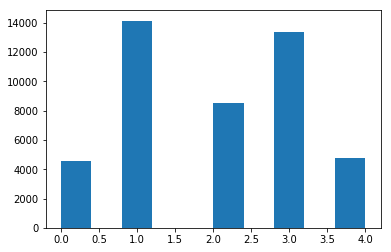

distinct values in y:[2 1 3 4 0]
The minimal amount of samples is 4542
The MAX amount of samples is 14142
            0         1         2         3         4         5         6    \
4515   0.513812 -1.650159 -0.833532 -2.224385 -1.331901  1.609228 -1.399446   
30403  0.348179 -2.514862 -1.473018 -2.097525 -0.993768  2.475192 -1.520734   
7247  -0.930262  1.013656  0.481101  1.387974  0.658675 -1.340404  0.038749   
24472 -0.152016  1.647851 -0.902604  0.064457  0.471347  0.744772  0.870909   
42041  1.204349 -0.457961 -0.270249 -0.933674 -2.054020  1.270225 -1.083802   
32758  0.024497 -0.119910 -0.890370 -0.217765  0.920383  0.671000 -0.474829   
23930 -1.106696  0.368897 -0.512205  2.117818 -0.584819 -0.077591  1.886089   
12452 -1.856071 -0.021237 -0.132971 -0.326642  1.814894 -0.171724 -0.250152   
2740   0.861431  0.382115  0.435170 -0.919776  1.143499 -1.357522  0.064138   
28227  0.653595 -0.541952 -0.244672 -2.013565  0.507704  0.735972  0.096537   
32689  0.286689  0.473247

            0         1         2         3         4         5         6    \
15123  1.097734  1.203373  0.161249  1.321501  0.376009 -0.242067 -0.400598   
28428  0.084552 -0.664100  0.108254  1.676133 -0.069025 -1.092597  1.552271   
39424  1.035958 -1.620495 -0.360541 -0.222789  0.099077 -0.539086  0.221626   
3048  -0.078938  0.325211  0.409051  0.352021  0.088241  0.861489 -0.544782   
25435  0.946295 -0.550621 -0.193233 -1.132955  0.982744 -0.068145  0.712725   
29051  0.575587 -0.709412 -0.646398  0.871111 -0.256684 -1.034713 -0.485764   
715    0.781232 -0.091168  2.304235 -0.784032  0.291661 -1.063962  1.127455   
2913  -0.562872 -0.795039  0.270880  0.080168  0.068628 -0.110301 -2.349084   
22734  1.331012  0.843774 -0.318805 -0.416066 -0.193142 -0.172899  0.536347   
6052  -0.084630 -1.571012 -0.357212  1.014094 -1.422536  1.014574  0.639766   
33991  0.024941  0.775020 -0.610333  0.866906  1.442085  1.689494 -0.439202   
34531  1.205508  1.225490 -1.046879  0.935794  1.379

              0         1         2         3         4         5         6  \
4515   0.513812 -1.650159 -0.833532 -2.224385 -1.331901  1.609228 -1.399446   
30403  0.348179 -2.514862 -1.473018 -2.097525 -0.993768  2.475192 -1.520734   
7247  -0.930262  1.013656  0.481101  1.387974  0.658675 -1.340404  0.038749   
24472 -0.152016  1.647851 -0.902604  0.064457  0.471347  0.744772  0.870909   
42041  1.204349 -0.457961 -0.270249 -0.933674 -2.054020  1.270225 -1.083802   

              7         8         9  ...       111       112       113  \
4515  -2.866104 -0.942613  0.348602  ... -1.400507  0.724450  1.522904   
30403 -2.202607 -0.261386 -0.494080  ... -3.037160  2.500699  0.369105   
7247   0.552889 -1.464562  0.997589  ... -1.993605 -0.987547 -0.238396   
24472  0.282027 -0.171014  0.221694  ... -1.122461  0.133572 -0.338439   
42041 -1.884794 -1.607876  0.410537  ... -0.128113  0.517678  0.676513   

            114       115       116       117       118       119  y  
4515   0.

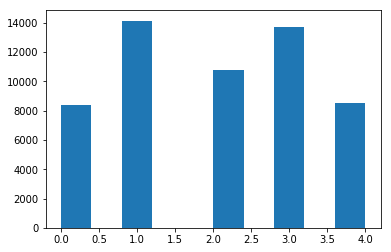

distinct values in y are now:[4 2 1 3 0]


In [81]:
# some outlier removal for
# When we use the DBSCN from last time my machine dies ;(

# IM RELATIVELY CONFIDENT THAT UP-SAMPLING OR DOWN-SAMPLING IN A BETTER WAY SHOULD
# DO THE HARDLINE
import pandas as pd

print(X_train.shape,y_train.shape)
print(y_train)
# balanced?
plt.hist(y_train)
plt.show()
# nope its not at all
#but how...

# lets balance classes
new_combined=pd.DataFrame(X_train)
new_combined['y']=pd.DataFrame(y_train)
print(f'distinct values in y:{new_combined.y.unique()}')
# get distinct y values
y_distinct=new_combined.y.unique()
min_sample_size=min([new_combined[new_combined.y==i].shape[0] for i in y_distinct])
#there is a mean and mx approach that can work, max was too much, so i now even go down to 50%
max_sample_size=int(np.max([new_combined[new_combined.y==i].shape[0] for i in y_distinct]))


print(f"The minimal amount of samples is {min_sample_size}")
print(f"The MAX amount of samples is {max_sample_size}")

balanced_X=pd.DataFrame()
balanced_Y=pd.DataFrame()
# lets upscale somehow, the gaussian approach doesnt work well
# probably since the true distribution is not gaussian
gaussian=False


for i in y_distinct:
    sample_amount=new_combined[new_combined.y==i].shape[0]
    if gaussian:
        #lets check that we dont add too much data
        diff=int((max_sample_size-sample_amount)*0.5)
        #lets assume some gaussian thingy
        working_set=new_combined[new_combined.y==i]
        working_set=working_set.drop(['y'],axis=1)
        if diff>0:
            print(f'generating an addition {diff} samples')
            print(f'working set shape:{working_set.shape}')
            mean=working_set.mean()
            cov=np.cov(working_set.T)
            print(f'shape mean:{mean.shape} shape cov:{cov.shape}')
            #we generate more points assuming a gaussian distribution
            generated=np.random.multivariate_normal(mean, cov, diff)
            print(generated)
            print(f'shape generated:{generated.shape}')
            generated_df=pd.DataFrame(generated)
            generated_df['y']=i
            balanced_X=balanced_X.append(generated_df)
        working_set['y']=i
        balanced_X=balanced_X.append(working_set)
    else:
        # random samples from the distribution and adds them until all classes are balanced
        diff=int((max_sample_size-sample_amount))
        working_set=new_combined[new_combined.y==i]
        working_set=working_set.drop(['y'],axis=1)
        if diff>0:
            # lets try bit how much to skew the org distribution
            generated=working_set.sample(frac=(diff/sample_amount)*0.4,replace=True)
            print(generated)
            print(f'shape generated:{generated.shape}')
            generated_df=pd.DataFrame(generated)
            generated_df['y']=i
            balanced_X=balanced_X.append(generated_df)
        working_set['y']=i
        balanced_X=balanced_X.append(working_set)

    
# ok that should now be muhc more data
print(balanced_X.head())
# shuffle again such that it makes bit more sense
balanced_X=balanced_X.sample(frac=1)
# shuffle again such that it makes bit more sense

balanced_X=balanced_X.sample(frac=1)
# shuffle again such that it makes bit more sense

balanced_X=balanced_X.sample(frac=1)
#shuffle dosnt shuffle as much at it seems #idk
print(balanced_X.head())


balanced_Y=balanced_X.y
balanced_X=balanced_X.drop(['y'],axis=1)

assert balanced_X.shape[0]==balanced_Y.shape[0]
balanced_Y=balanced_Y.values.reshape((-1,))
balanced_X=balanced_X.values
print(f'We had {X_train.shape} samples and have scaled it to {balanced_X.shape} samples')
plt.hist(balanced_Y)
plt.show()
print(f'distinct values in y are now:{pd.DataFrame(balanced_Y)[0].unique()}')


In [82]:
# Lets do some feature selection order nto efficient but idk
from sklearn.feature_selection import SelectKBest, chi2
import sklearn as sk


# scaler = sk.preprocessing.MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(balanced_X)
# X_scaled = scaler.transform(balanced_X)


# print(X_scaled.shape)
# from sklearn.preprocessing import scale
# print(X_scaled)
selecter=SelectKBest(k=120)
X_norm_small = selecter.fit_transform(balanced_X, balanced_Y)
print(X_norm_small.shape)



(55478, 120)


# Helper functions to build, compile and fit models

In [102]:
def three_layer_model(units_first, units_second, units_third, n_final_classes, kernel_size=3):
    """Creates three layer model with dropout and regularization."""
    model = keras.Sequential([
        keras.layers.Dense(2048, activation=tf.nn.relu),
        keras.layers.Dropout(0.5, noise_shape=None, seed=22),
        keras.layers.BatchNormalization(),
         keras.layers.Dense(1024, activation=tf.nn.relu),
         keras.layers.Dropout(0.3, noise_shape=None, seed=33),
         keras.layers.BatchNormalization(),
        
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dropout(0.2, noise_shape=None, seed=666),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dropout(0.2, noise_shape=None, seed=666),
        keras.layers.BatchNormalization(),
        keras.layers.Reshape((8,8)),
        # wierd but seems to work quite well
        keras.layers.MaxPooling1D(pool_size=4, strides=None, padding='valid', data_format='channels_last'),
        keras.layers.Dropout(0.1, noise_shape=None, seed=666),
        keras.layers.Flatten(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation=tf.nn.relu),
        #keras.layers.Embedding(units_third, 16),
        keras.layers.Dropout(0.1, noise_shape=None, seed=666),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(n_final_classes, activation=tf.nn.softmax)
    ])
    return model

def compile_model(model):
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_accuracy',
                  metrics=['accuracy'])
    return model
    
def fit_model(model, epochs, callbacks):
    #print(f'Shape x:{X_train.shape} y:{y_train}')
    print('type x:'+str(type(balanced_X)))
    print('type y:'+str(type(balanced_Y)))

    model.fit(X_norm_small, balanced_Y, epochs=epochs, validation_split=0.2, verbose=1, shuffle=True, workers=-1,
             callbacks=callbacks)
    y_pred = model.predict_classes(X_norm_small)
    print(classification_report(balanced_Y, y_pred))

# Define callbacks and tensorboard logging

In [93]:
from common import DATA_DIR_PATH
from tensorflow.keras import callbacks

In [94]:
LOG_DIR = os.path.join(DATA_DIR_PATH, DIR_NAME, 'logs')
tensorboard = callbacks.TensorBoard()
early_stopping = callbacks.EarlyStopping(patience=10)

# Build models

In [95]:
# U can define multiple models and compare them

models = [
    #('small',  compile_model(three_layer_model(128, 128, 128, 5))),
     
    #('medium', compile_model(three_layer_model(256, 256, 256, 5))),
          ('large',  compile_model(three_layer_model(512, 256, 128, 5)))]

# Or if u decided which one to use just define one and use it
# models = [('baseline', compile_model(three_layer_model(128, 128, 128, 5)))]

# Fit

In [96]:
EPOCHS = 100  # pretty high since we have early stopping callback anyway

for name, model in models:
    print(f'Fitting model {name}...')
    log_path = os.path.join(LOG_DIR, name + '_' + neural_nets.get_date_time_tag())
    tensorboard.log_dir = log_path
    fit_model(model, epochs=EPOCHS, callbacks=[tensorboard,early_stopping])
              
              
              

Fitting model large...
type x:<class 'numpy.ndarray'>
type y:<class 'numpy.ndarray'>
Train on 44382 samples, validate on 11096 samples
Epoch 1/100
44382/44382 [==============================] - 91s 2ms/sample - loss: 0.6176 - acc: 0.7801 - val_loss: 0.3420 - val_acc: 0.8852
Epoch 2/100
44382/44382 [==============================] - 245s 6ms/sample - loss: 0.4615 - acc: 0.8406 - val_loss: 0.2991 - val_acc: 0.8987
Epoch 3/100
44382/44382 [==============================] - 55s 1ms/sample - loss: 0.4105 - acc: 0.8604 - val_loss: 0.2794 - val_acc: 0.9035
Epoch 4/100
44382/44382 [==============================] - 54s 1ms/sample - loss: 0.3894 - acc: 0.8677 - val_loss: 0.2614 - val_acc: 0.9084
Epoch 5/100
44382/44382 [==============================] - 54s 1ms/sample - loss: 0.3701 - acc: 0.8739 - val_loss: 0.2511 - val_acc: 0.9156
Epoch 6/100
44382/44382 [==============================] - 55s 1ms/sample - loss: 0.3525 - acc: 0.8775 - val_loss: 0.2481 - val_acc: 0.9124
Epoch 7/100
44382/44382 

44382/44382 [==============================] - 52s 1ms/sample - loss: 0.1795 - acc: 0.9380 - val_loss: 0.1556 - val_acc: 0.9477
Epoch 59/100
44382/44382 [==============================] - 52s 1ms/sample - loss: 0.1795 - acc: 0.9375 - val_loss: 0.1519 - val_acc: 0.9455
Epoch 60/100
44382/44382 [==============================] - 53s 1ms/sample - loss: 0.1794 - acc: 0.9373 - val_loss: 0.1520 - val_acc: 0.9477
Epoch 61/100
44382/44382 [==============================] - 52s 1ms/sample - loss: 0.1807 - acc: 0.9372 - val_loss: 0.1539 - val_acc: 0.9462
Epoch 62/100
44382/44382 [==============================] - 51s 1ms/sample - loss: 0.1767 - acc: 0.9389 - val_loss: 0.1522 - val_acc: 0.9464
Epoch 63/100
44382/44382 [==============================] - 52s 1ms/sample - loss: 0.1739 - acc: 0.9402 - val_loss: 0.1504 - val_acc: 0.9477
Epoch 64/100
44382/44382 [==============================] - 52s 1ms/sample - loss: 0.1738 - acc: 0.9410 - val_loss: 0.1566 - val_acc: 0.9457
Epoch 65/100
44382/44382 [

# For better visualization of all current and past runs, use tensorboard
1) Go to the data directory (e.g. DATA_DIR_PATH/task3_data)  
2) Create a folder names "logs" (mkdir logs)  
3) Type ```tensorboard --logdir=logs```

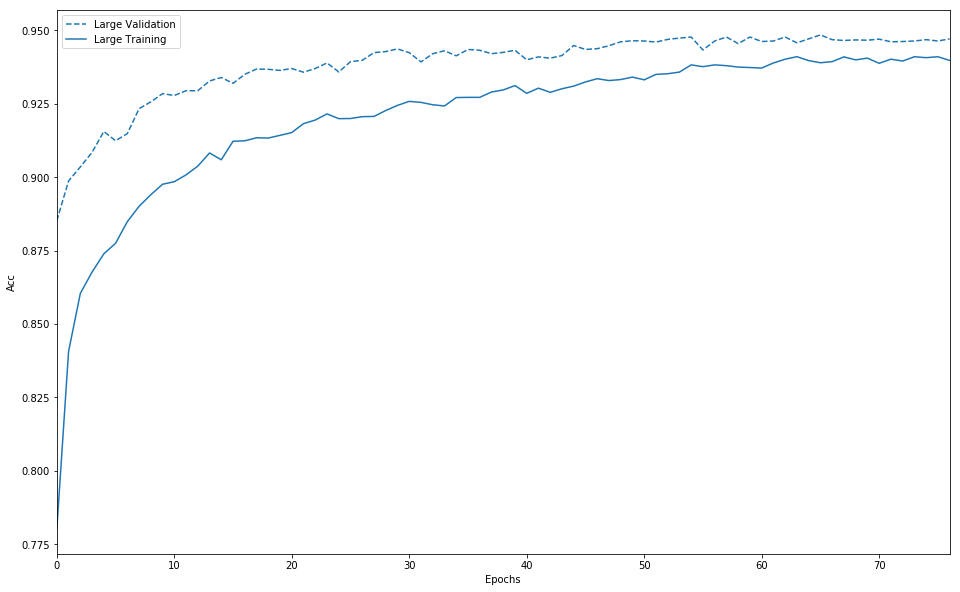

In [97]:
neural_nets.plot_history(models)  # can add more models as needed


# Performance evaluation on held out test dat
This is the section where we get a sense of how well our trained model is doing on the part of the training set we did not touch during training.  
**Only performed if HELD_OUT_TEST_SET_SIZE > 0**

In [98]:
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.metrics import plot_roc

ModuleNotFoundError: No module named 'scikitplot'

In [99]:
def evaluate_models(models):
    results = {}
    for name, model in models:
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        results[name] = {'test accuracy': test_acc, 'test loss': test_loss}

    return pd.DataFrame(results).transpose()

def select_best_model(results_df, models):
    best_model_name = results_df.idxmax()['test accuracy']
    best_model = None
    for name, model in models:
        if name == best_model_name:
            best_model = model
            break
    return best_model_name, best_model


if len(X_test) > 0:
    results_df = evaluate_models(models)
    best_model_name, model = select_best_model(results_df, models)
    print(f'Best model: {best_model_name}')
    print(results_df)
    y_pred_proba = model.predict(X_test)
    y_pred = [np.argmax(proba) for proba in y_pred_proba]
    _ = plot_confusion_matrix(y_test, y_pred, figsize=(12, 8))
    _ = plot_roc(y_test, y_pred_proba, figsize=(8, 8))
else:
    print('There is no test data to test on.')

There is no test data to test on.


# Perform final prediction on provided test data set
Now we perform predictions on the provided, unlabelled data set for submission

In [100]:
y_pred_final = [np.argmax(proba) for proba in model.predict(selecter.transform(final_test_data))]
y_pred_ids = final_indices



# Store the data
Putting everything into the right format and storing the results in the working data directory

In [101]:
data_handler.store_results_task3(y_pred_final, y_pred_ids)